# INPUT-OUTPUT RELATIONS IN THE PATHWAY OF RECURRENT INHIBITION TO MOTONEURONES IN THE CAT
Afterhyperpolarization following a short (1 ms) instracellular pulse just at threshold for triggering a spike had an amplitude of 2 mV and a duration of about 30 ms.

Parameters adjusted:
* Rheobase current, according to the FxI curve from the same paper
* Slow potassium conductance (hand tuned), to get right amplitudes, since more permeability will result in a stronger net current ($I=g(V-E)$) and therefore membrane potentials closer to the potassium equilibrium when the channels are opened
* Slow potassium $\text{beta}_q$, to achieve correct duration, since it is how long the inactivation of slow potassium is. Maybe it would also work with the fast one, but doing modifications to the slow makes more sense because it remains opened for a longer time.
* Specific resistity, to result in the same time constant used in Maltenfort et al. 1998
* Mean soma diameter, according to Fyffe 1990
* Mean soma length, calculated from mean soma diameter (Fyffe 1990) and soma+dendritic surface area (Bui et al. 2003)

Considerations:
* Spontaneous activity is not important here, so it was turned off in order to avoid other action potentials.

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from InterneuronPoolOpt import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [2]:
def simulator(numberRC, duration, current, newParametrization, finalParametrization):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    if not newParametrization:
        # Parameters from java
        ## Threshold (makes a rheobase of 0.5 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0.172
        conf.confArray['f2'][idx] = 0.172
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        if finalParametrization:
            # Threshold (makes a rheobase of 0.5 nA for chosen Rm)
            idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 0.6
            conf.confArray['f2'][idx] = 0.6

            # Ks
            idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 1100
            idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 0.015
            
            ## Morphology
            idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 27
            conf.confArray['f2'][idx] = 27
            idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 218
            conf.confArray['f2'][idx] = 218
            idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 221.897
            conf.confArray['f2'][idx] = 221.897
            idx = np.where(conf.confArray['f0']=='membCapac_IN')[0][0]
            conf.confArray['f1'][idx] = 1
    else:
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        if finalParametrization:
            # Threshold (makes a rheobase of 0.5 nA)
            idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 193.5494
            conf.confArray['f2'][idx] = 193.5494

            # Ks
            idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 1100
            idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 0.015
            
            ## Morphology
            idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 27
            conf.confArray['f2'][idx] = 27
            idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 20.66656
            conf.confArray['f2'][idx] = 20.66656
            idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 8000
            conf.confArray['f2'][idx] = 8000
    
    pools = dict()
    pools[0] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    RC_mV = np.zeros_like(t)
    for i in xrange(0, len(t)):
        if t[i]>10 and t[i]<11:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = current
        else:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = 0
        pools[0].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[0].v_mV[0]

    pools[0].listSpikes()

    return RC_mV, t

In [3]:
nRC = 1
t = 200
newParams = False
finalParams = True
i = 0.5

RCMembrane, t = simulator(nRC, t, i, newParams, finalParams)

IndexError: index 0 is out of bounds for axis 0 with size 0

<IPython.core.display.Javascript object>


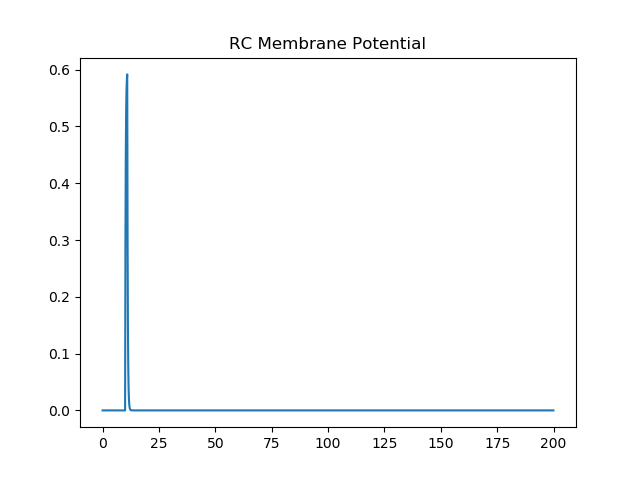

In [110]:
plt.figure()
plt.plot(t, RCMembrane)
plt.title('RC Membrane Potential')
plt.show()